In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *

In [3]:
m = 1000
d = 100
q = 2
active = relu

ratio_train = 0.7

In [4]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [5]:
y = (1+np.linalg.norm(X, axis=-1))**(-0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [6]:
Ns = np.arange(1, 20201, 200)

In [7]:
results_dense = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense.append(res)

In [8]:
results_sparse = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, q, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse.append(res)

[0.018432232259446086, 0.002302152489635701, 0.0025020693227988866, 0.004208378796220349, 0.004401021894484524, 0.00287439909188618, 0.002436566886785113, 0.002161104314257387, 0.0020239751808498814, 0.001937959663862058, 0.0018114538764804182, 0.0018252602679622524, 0.00179721697725531, 0.0017626145551285037, 0.0017422571091539184, 0.001705541666041032, 0.0016869877057952153, 0.0016841460729826632, 0.001700955405317998, 0.0016734698437851918, 0.0016660407852461313, 0.0016236465039919524, 0.0016566850558047848, 0.0016467896722584564, 0.001588971657382179, 0.0016176488890647673, 0.0016089348862323345, 0.001583644319016319, 0.0016112620046968378, 0.0016019491779242251, 0.0015842328869846343, 0.0015898317206149422, 0.0016064893268637778, 0.0016136799539084282, 0.00158617334237695, 0.0015661284913158792, 0.0015623805655041484, 0.00155739555357757, 0.0015668438151653717, 0.00156665385323649, 0.0015436906325294198, 0.001553119547064988, 0.00157004481392666, 0.0015692942921885836, 0.001548919

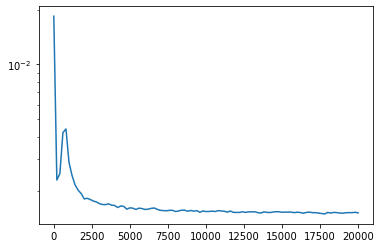

In [9]:
print([np.mean(res) for res in results_dense])
plt.semilogy(Ns, [np.mean(res) for res in results_dense])

[0.017670922735566537, 0.0024590561610413264, 0.0025352572066799526, 0.0043526023003580975, 0.005965659618039187, 0.0037185444423439447, 0.0031805117465743015, 0.0029868529244916715, 0.002832210446718233, 0.0026626895667980657, 0.002564192302000883, 0.002463061350862475, 0.0023228323953904655, 0.002408567007774123, 0.0022659797975451623, 0.0022679308558145738, 0.0022278550970691504, 0.0022517677860610713, 0.0021545675841288065, 0.002127957732680457, 0.0021448041724083803, 0.0021742969320900896, 0.0021246657154606963, 0.0021011369133198073, 0.002101844232965551, 0.002036222346185294, 0.002089436294971472, 0.002016521790996929, 0.0020127373170837322, 0.002027426559680595, 0.0020517608496502387, 0.002035212237911034, 0.0019976363855189394, 0.0020189860846137825, 0.0019794886911711227, 0.0019648022240444647, 0.002015022597992484, 0.0020128907816295495, 0.002003202856432704, 0.0019905861748641266, 0.001973740580098222, 0.001980895012975318, 0.0019296416639785741, 0.0020010135225282622, 0.00

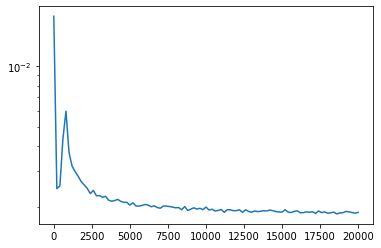

In [10]:
print([np.mean(res) for res in results_sparse])
plt.semilogy(Ns, [np.mean(res) for res in results_sparse])

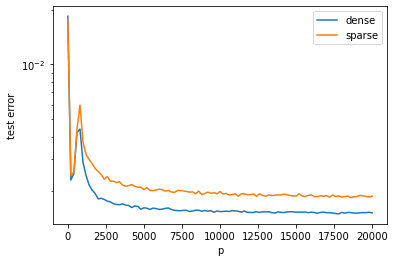

In [11]:
plt.semilogy(Ns, [np.mean(res) for res in results_dense], label="dense")
plt.semilogy(Ns, [np.mean(res) for res in results_sparse], label="sparse")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()